In [3]:
import pandas as pd  # Data handling
import numpy as np  # Numerical operations
import tensorflow as tf  # Deep learning framework
from tensorflow import keras  # High-level API for TensorFlow

import matplotlib.pyplot as plt  # Visualization
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.listdir("/content/drive/MyDrive/Data /fruits_classification")

['test', 'data_splitting.py', 'valid', 'train']

In [6]:
import os

# Double-check the path for typos and ensure it's correct
dataset_path = "/content/drive/MyDrive/Data /fruits_classification"  # Corrected path, if needed

# Print the directory contents
if os.path.exists(dataset_path):  # Check if the path exists before proceeding
    print(os.listdir(dataset_path))
else:
    print(f"Error: Directory not found - {dataset_path}")

['test', 'data_splitting.py', 'valid', 'train']


In [7]:
print(os.listdir("/content/drive/MyDrive/Data /fruits_classification/valid"))

['Mango', 'Grape', 'Strawberry', 'Apple', 'Banana']


In [8]:
# train data
train_data = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/Data /fruits_classification/train',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

# test data
test_data = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/Data /fruits_classification/test',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
# test data
test_data = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/Data /fruits_classification/valid',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)


Found 9700 files belonging to 5 classes.
Found 100 files belonging to 5 classes.
Found 200 files belonging to 5 classes.


In [9]:
# Store the class names before applying the map function
class_names = train_data.class_names

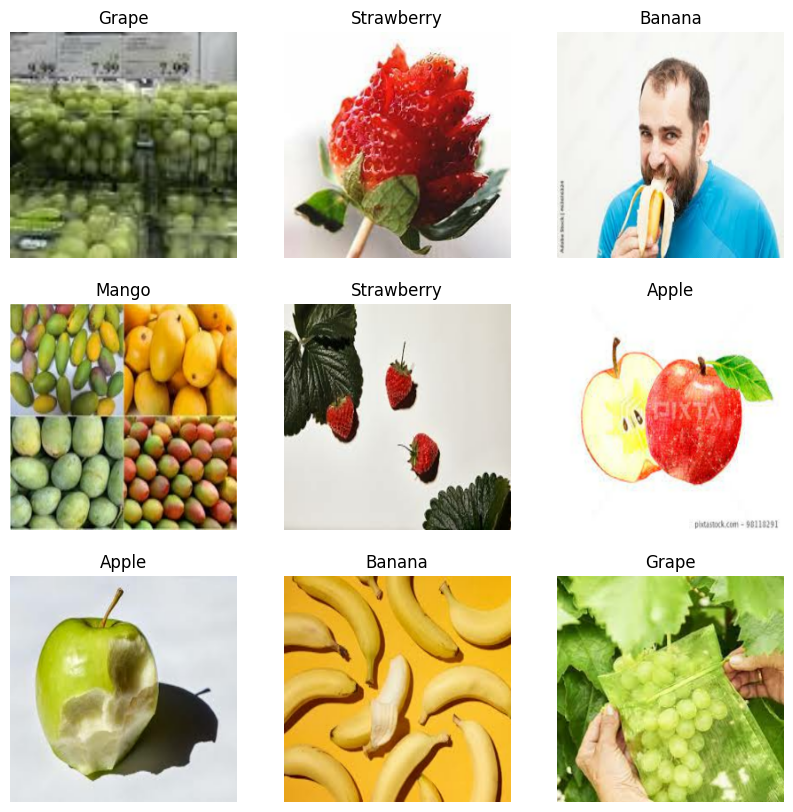

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Iterate through the dataset using 'take' to get one batch
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [13]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalisation ici

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         576,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,253 (2.55 MB)

 Trainable params: 669,253 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=1
history= model.fit(train_data, epochs= 1, validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()